## Kütüphaneleri Ekleme ve Veri Setini Okuma

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
df21 = pd.read_json("maas-anketi-2021.json", orient = "split")

In [3]:
df21['year'] = 2021
df21.head(5)

,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,salary_for_tl_currency,year
0,Middle,Back-end Developer,Php,3 - 5 Yıl,Erkek,Kurumsal,50 - 100 Kişi,Remote,Yurt Dışı,€ - Euro,2.000 - 2.999,,2021
1,Junior,Back-end Developer,Java,1 - 3 Yıl,Erkek,Startup,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,8.000 TL - 8.999 TL,2021
2,Junior,Back-end Developer,.Net,1 - 3 Yıl,Erkek,E-Ticaret,250+,Ofis,İzmir,₺ - Türk Lirası,,3.000 TL - 3.999 TL,2021
3,Junior,Front-end Developer,"JavaScript | Html | Css, React",0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Remote,Yurt Dışı,₺ - Türk Lirası,,3.000 TL - 3.999 TL,2021
4,Middle,Front-end Developer,.Net,1 - 3 Yıl,Kadın,Kurumsal,250+,Ofis,İstanbul,₺ - Türk Lirası,,9.000 TL - 9.999 TL,2021


In [4]:
df21.shape

(2636, 13)

In [5]:
with open("maas-anketi-2022.json","r") as d:
    veriler = json.load(d)

In [6]:
df22 = pd.DataFrame(veriler["RECORDS"])

In [7]:
df22['year'] = 2022
df22.head(5)

,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,salary_for_tl_currency,year
0,Middle,Back-end Developer,Php,3 - 5 Yıl,Erkek,Startup,25 - 50 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,None,15.000 TL - 15.999 TL,2022
1,Junior,Front-end Developer,React,0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,None,8.000 TL - 8.999 TL,2022
2,Middle,Back-end Developer,.Net,1 - 3 Yıl,Erkek,Outsource,10 - 25 Kişi,Remote,İstanbul,₺ - Türk Lirası,None,15.000 TL - 15.999 TL,2022
3,Junior,Full Stack Developer,"Java, JavaScript | Html | Css, React, React Na...",1 - 3 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,None,10.000 TL - 10.999 TL,2022
4,Junior,Back-end Developer,".Net, JavaScript | Html | Css",0 - 1 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,Kocaeli,₺ - Türk Lirası,None,5.000 TL - 5.999 TL,2022


In [8]:
df22.shape

(5030, 13)

## İki Verisetini Birleştirme

In [9]:
df = pd.concat([df21,df22],ignore_index = True)

In [10]:
df.shape

(7666, 13)

## Veri Düzenleme

In [11]:
df.dtypes

level                        object
position                     object
tech_stack                   object
experience                   object
gender                       object
company                      object
company_size                 object
work_type                    object
city                         object
currency                     object
salary_for_other_currency    object
salary_for_tl_currency       object
year                          int64
dtype: object

Üzerinde sayısal işlemler yapacağımız için maaşların olduğu kolonları numeric tipine dönüştürüyoruz.

In [12]:
z = 0
for i in df.salary_for_tl_currency:
    if i is None:
        z += 1
        pass
    elif len(str(i)) > 1:
        if i[7] == "T":
            df.salary_for_tl_currency.iloc[z] = (int(i[0:2])*1000)+ 500
            z += 1
        elif i[6] == "T":
            df.salary_for_tl_currency.iloc[z] = (int(i[0])*1000)+ 500
            z += 1
        else:
            z += 1
            pass
    else:
        z +=1
        pass

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
for i in df.salary_for_other_currency.unique():
    print(i)

2.000 - 2.999

3.000 - 3.999
10.000 ve üzeri
4.000 - 4.999
5.000 - 5.999
8.000 - 8.999
9.000 - 9.999
6.000 - 6.999
7.000 - 7.999
None
1000 - 1.999


In [14]:
z = 0
for i in df.salary_for_other_currency:
    if i is None:
        z += 1
        pass
    elif len(str(i)) > 1:
        if i == "1000 - 1.999":
            df.salary_for_other_currency.iloc[z] = 1500
            z += 1
        elif i[7] == "-" or i[7] == "v":
            df.salary_for_other_currency.iloc[z] = (int(i[0:2])*1000)+ 500
            z += 1
        elif i[6] == "-":
            df.salary_for_other_currency.iloc[z] = (int(i[0])*1000)+ 500
            z += 1
        else:
            z += 1
            pass
    else:
        z +=1
        pass

In [15]:
df.head(30)

,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,salary_for_tl_currency,year
0,Middle,Back-end Developer,Php,3 - 5 Yıl,Erkek,Kurumsal,50 - 100 Kişi,Remote,Yurt Dışı,€ - Euro,2500,,2021
1,Junior,Back-end Developer,Java,1 - 3 Yıl,Erkek,Startup,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,8500,2021
2,Junior,Back-end Developer,.Net,1 - 3 Yıl,Erkek,E-Ticaret,250+,Ofis,İzmir,₺ - Türk Lirası,,3500,2021
3,Junior,Front-end Developer,"JavaScript | Html | Css, React",0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Remote,Yurt Dışı,₺ - Türk Lirası,,3500,2021
4,Middle,Front-end Developer,.Net,1 - 3 Yıl,Kadın,Kurumsal,250+,Ofis,İstanbul,₺ - Türk Lirası,,9500,2021
5,Middle,Front-end Developer,"Php, JavaScript | Html | Css, React, Vue, Reac...",3 - 5 Yıl,Erkek,Kurumsal,25 - 50 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,,6500,2021
6,Junior,Back-end Developer,.Net,0 - 1 Yıl,Erkek,Kurumsal,10 - 25 Kişi,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,4500,2021
7,Junior,Back-end Developer,Java,1 - 3 Yıl,Erkek,E-Ticaret,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,6500,2021
8,Middle,Game Developer,C#,5 - 7 Yıl,Erkek,Startup,1 - 10 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,,8500,2021
9,Senior,Full Stack Developer,Java,7 - 10 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,10500,2021


In [16]:
df[df.columns[10]].count() # diğer parabirimleri için dolu satırların sayısı

3169

In [17]:
pd.to_numeric(df["salary_for_tl_currency"])

0           NaN
1        8500.0
2        3500.0
3        3500.0
4        9500.0
         ...   
7661     8500.0
7662    10500.0
7663     8500.0
7664    25500.0
7665    11500.0
Name: salary_for_tl_currency, Length: 7666, dtype: float64

In [18]:
pd.to_numeric(df["salary_for_other_currency"])

0       2500.0
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
7661       NaN
7662       NaN
7663       NaN
7664       NaN
7665       NaN
Name: salary_for_other_currency, Length: 7666, dtype: float64

## Veri Bize Ne Söylüyor ?

Veriseti, görüldüğü üzere şirketlerin bilişim departmanında bulunan yazılımcılarının özelliklerinden, bilgilerinden oluşmaktadır.

Bilgiler ışığında birden fazla analiz gerçekleştirebiliriz. 

Bunlardan bazıları;

    "Seviyeye göre verilen maaşlar",
    "İlgilenilen dile göre verilen maaşlar",
    "Deneyime göre verilen maaşlar",
    "Cinsiyete göre maaşlar",
    "Şirket büyüklüğüne göre değişen maaşlar",
    "Yıla göre değişen maaşlar",
    "Seviyeye göre tecrübe süresi",
    "Cinsiyete göre çalışma tipi",
    "Şirket tipine göre şirket büyüklüğü" 


Bu veri bize yazılımla ilgilenen ve bundan para kazanan insanlarla ilgili bilgiler sunarak yazılımla ilgilenen insanların toplumdaki yerlerini, yaşam standartlarını, çalışma koşullarını ve ilgi alanlarındaki spesifik teknolojileri bizlere sunarak, ilgili toplum ve sektör hakkında ışık tutar.

Biz de ilk olarak bu veriyi ilgili alanlarda kullanmak amacıyla bazı ana başlıklara böleceğiz ve analiz edeceğiz. 

## TL ve Diğer Parabirimleri

Maaşını döviz alanların ve Tl alanların para olarak değeri aynı olmadığı için analizi ayrı değerlendiriyoruz. Öncelikle Türk Lirası kazanan yazılımcıları ayrı bir verisetine aktarıyoruz.

In [19]:
df_tl = df.copy()

In [20]:
df_tl["salary_for_tl_currency"].dropna(inplace = True)

Verisetimizde Türk Lirası kazananları ayıracağımız için 'salary_for_tl_currency' kolonunda boş olan satırları, ayrıca 'salary_for_other_currency' kolonunu siliyoruz.

In [21]:
indexes = []
for i in range(0,len(df_tl)):
    if type(df_tl["salary_for_tl_currency"][i]) == str:
        indexes.append(i)
df_tl = df_tl.drop(indexes, axis = 0)

In [22]:
df_tl.reset_index(inplace = True)

In [23]:
df_tl.head(4)

,index,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,salary_for_tl_currency,year
0,1,Junior,Back-end Developer,Java,1 - 3 Yıl,Erkek,Startup,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,,8500,2021
1,2,Junior,Back-end Developer,.Net,1 - 3 Yıl,Erkek,E-Ticaret,250+,Ofis,İzmir,₺ - Türk Lirası,,3500,2021
2,3,Junior,Front-end Developer,"JavaScript | Html | Css, React",0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Remote,Yurt Dışı,₺ - Türk Lirası,,3500,2021
3,4,Middle,Front-end Developer,.Net,1 - 3 Yıl,Kadın,Kurumsal,250+,Ofis,İstanbul,₺ - Türk Lirası,,9500,2021


Şimdi de diğer para birimleri ile kazananları ayrı bir verisetine aktaralım..

In [24]:
df_other = df.copy()
indexes2 = []
for i in range(0,len(df_other)):
    if df_other.currency.iloc[i] == "₺ - Türk Lirası":
        indexes2.append(i)
df_other = df_other.drop(indexes2, axis = 0)
df_other.reset_index(inplace = True)
df_other = df_other.drop("salary_for_tl_currency", axis = 1)
df_other.reset_index(inplace = True)
df_other.head(5)

,level_0,index,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,year
0,0,0,Middle,Back-end Developer,Php,3 - 5 Yıl,Erkek,Kurumsal,50 - 100 Kişi,Remote,Yurt Dışı,€ - Euro,2500,2021
1,1,11,Junior,Full Stack Developer,"Java, JavaScript | Html | Css, React, Vue",0 - 1 Yıl,Erkek,Kurumsal,50 - 100 Kişi,Hibrit (Ofis + Remote),Belcika,€ - Euro,2500,2021
2,2,27,Middle,Front-end Developer,"JavaScript | Html | Css, Angular",5 - 7 Yıl,Erkek,E-Ticaret,50 - 100 Kişi,Hibrit (Ofis + Remote),Kopenhag,€ - Euro,3500,2021
3,3,34,Senior,Front-end Developer,React,5 - 7 Yıl,Erkek,E-Ticaret,250+,Hibrit (Ofis + Remote),Dubai,$ - Dolar,10500,2021
4,4,37,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,SaaS sağlayıcı,50 - 100 Kişi,Ofis,Ankara,$ - Dolar,4500,2021


### Kur karşılaştırması    Dolar-Euro-Sterlin /TL

In [25]:
df.currency.unique()

array(['€ - Euro', '₺ - Türk Lirası', '$ - Dolar', '£ - Sterlin'],
      dtype=object)

Görüldüğü üzere çalışanların genel verisetimizde 4 farklı parabiriminden biri ile maaşlarını aldıkları görülmektedir.

Ayrıca çalışmanın ilerisinde, Türkiye'de Döviz ile maaş alanların kazançlarını TL karşılığı ile analiz etmek için, Bloomberght'den güncel "Döviz/TL" değeri çeken fonksiyon oluşturulmuştur.  

In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
ayarlar = webdriver.ChromeOptions()
ayarlar.headless = True
driver = webdriver.Chrome(options=ayarlar)

def dolar():
    driver.get("https://www.bloomberght.com/doviz/dolar")
    try:
        return driver.find_element(By.CLASS_NAME , "LastPrice.upGreen").text
    except:
        return driver.find_element(By.CLASS_NAME , "LastPrice.downRed").text

def euro():
    driver.get("https://www.bloomberght.com/doviz/euro")
    try:
        return driver.find_element(By.CLASS_NAME , "LastPrice.upGreen").text
    except:
        return driver.find_element(By.CLASS_NAME , "LastPrice.downRed").text

def sterlin():
    driver.get("https://www.bloomberght.com/doviz/ingiliz-sterlini")
    try:
        return driver.find_element(By.CLASS_NAME , "LastPrice.upGreen").text
    except:
        return driver.find_element(By.CLASS_NAME , "LastPrice.downRed").text
dolar = dolar()
euro = euro()
sterlin = sterlin()

In [31]:
sterlin

'20,2757'

İnternetten çekilen değerlerin ondalık birimi "," olduğundan değiştirilir.

In [32]:
dolar = dolar.replace(",",".")
euro = euro.replace(",",".")
sterlin = sterlin.replace(",",".")

In [33]:
dolar = float(dolar)
euro = float(euro)
sterlin = float(sterlin)

### Analiz 1 - Seviyeye göre tecrübe

In [34]:
df_tl.level.unique() 

array(['Junior', 'Middle', 'Senior'], dtype=object)

In [35]:
dfg = df_tl.groupby('level')['experience'].value_counts()
dfg2 = df_tl.groupby('experience')['level'].value_counts()

In [36]:
import matplotlib.pyplot as plt

In [37]:
dfg

level   experience     
Junior  0 - 1 Yıl          1040
        1 - 3 Yıl           812
        3 - 5 Yıl            40
        7 - 10 Yıl           10
        5 - 7 Yıl             7
        15 Yıl ve üzeri       2
        10 - 14 Yıl           1
Middle  1 - 3 Yıl           980
        3 - 5 Yıl           950
        5 - 7 Yıl           286
        7 - 10 Yıl          116
        0 - 1 Yıl            45
        10 - 14 Yıl          30
        15 Yıl ve üzeri      13
Senior  7 - 10 Yıl          818
        10 - 14 Yıl         806
        5 - 7 Yıl           653
        15 Yıl ve üzeri     458
        3 - 5 Yıl           324
        1 - 3 Yıl            43
        0 - 1 Yıl             5
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience'>

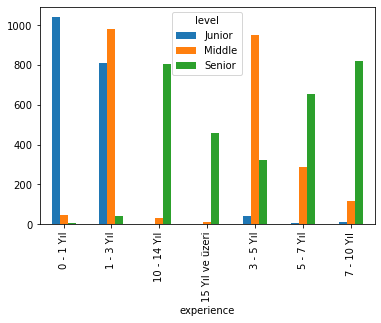

In [38]:
dfg = dfg.sort_index(level='experience', sort_remaining=False)
dfg.unstack(0).plot.bar()

Ünvanlara göre çalışanların alandaki deneyimleri gösterilmiştir. 0-3 yıl aralığında Junior developerlar daha fazla iken 5 yıldan fazla deneyimi olanların fazlaca Senior ünvanına sahip olduğu görülmektedir. 

### Analiz 2 - Cinsiyete ve Ünvana göre Dağılım

<AxesSubplot:xlabel='gender'>

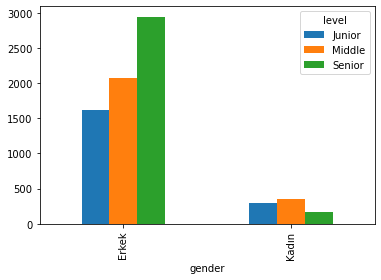

In [39]:
dfgender = df_tl.groupby('level')['gender'].value_counts()
dfgender = dfgender.sort_index(level='gender', sort_remaining=False)
dfgender.unstack(0).plot.bar()

### Analiz 3 - Seviyeye göre maaş (TL)

In [40]:
df_tl.groupby('level')["index"].count()

level
Junior    1912
Middle    2420
Senior    3107
Name: index, dtype: int64

In [41]:
lev1 = df_tl.groupby('level')['salary_for_tl_currency'].mean()

[Text(0, 0, '8083.92'), Text(0, 0, '12344.9'), Text(0, 0, '20143.5')]

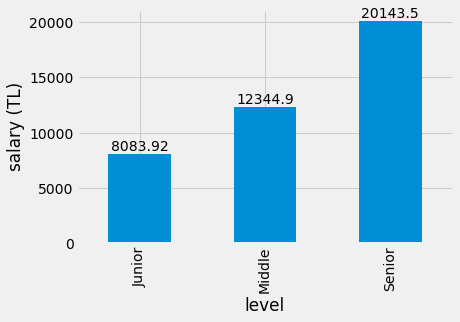

In [42]:
plt.style.use("fivethirtyeight")
ax = lev1.plot.bar(ylabel = "salary (TL)")
ax.bar_label(ax.containers[0], label_type='edge')


Ayrıca TL ile para kazananların ünvanlarına göre ortalama kazandıkları ücret tabloda yer almaktadır. 

In [43]:
df_tl.salary_for_tl_currency.mean() #Ankete katılan herkesin ortalama maaşı

14377.716603882933

Ünvan bakılmaksızın ortalama maaş ise yaklaşık 14500 liradır. 

### Parabirimlerine göre şehirler ve çalışan adetleri

In [44]:
dfc = df.groupby('currency')['city'].value_counts()

Bu kısım dolarla kazananların Türkiye'de de olduğu ve bu kişilerin de analizde yer almaları gerektiğini belirtmek için konulmuştur. Çalışmanın ilerleyen kısımlarında gösterilecektir.

In [45]:
dfc.head(10)

currency   city     
$ - Dolar  Yurt Dışı    136
           İstanbul     124
           Ankara        34
           İzmir         25
           Dubai          8
           Antalya        4
           New York       4
           Londra         3
           Sydney         3
           ABD            2
Name: city, dtype: int64

### Analiz 4 - Şirket büyüklüğüne göre çalışanlara verilen maaşlar

In [46]:
df.company_size.unique()

array(['50 - 100 Kişi', '100 - 250 Kişi', '250+', '10 - 25 Kişi',
       '25 - 50 Kişi', '1 - 10 Kişi'], dtype=object)

In [47]:
comp1 = df_tl.groupby('company_size')['salary_for_tl_currency'].mean()

Bu kısım index düzeltmesi yapılarak grafiğin daha 'okunabilir' hale gelmesi için yazılmıştır.

In [48]:
a = comp1[2]
comp1[2] = comp1[3]
comp1[3] = a

In [49]:
b = comp1[3]
comp1[3] = comp1[5]
comp1[5] = b

In [50]:
comp1

company_size
1 - 10 Kişi       10366.597725
10 - 25 Kişi      11035.671100
100 - 250 Kişi    13487.823440
25 - 50 Kişi      14185.636856
250+              16617.587259
50 - 100 Kişi     15374.015748
Name: salary_for_tl_currency, dtype: float64

In [51]:
comp1.index = ['1-10', '10-25', '25-50', '50-100','100-250', '250+']

<AxesSubplot:title={'center':'Şirket Büyüklüğü / Verilen Maaş'}, xlabel='Şirket Büyüklüğü (Kişi Adedi)', ylabel='salary (TL)'>

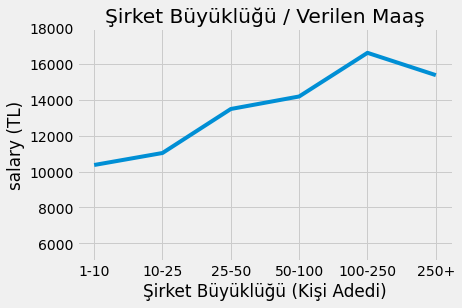

In [48]:
plt.style.use("fivethirtyeight")
comp1.plot(ylabel = "salary (TL)", ylim = (5000,18000), xlabel = "Şirket Büyüklüğü (Kişi Adedi)", title = "Şirket Büyüklüğü / Verilen Maaş")

### Analiz 5 - Şirket Büyüklüğüne göre Tecrübe Ortalaması

In [52]:
comp2 = df_tl.groupby('company_size')['experience'].value_counts()

In [53]:
comp2

company_size    experience     
1 - 10 Kişi     1 - 3 Yıl          297
                0 - 1 Yıl          246
                3 - 5 Yıl          151
                10 - 14 Yıl         90
                7 - 10 Yıl          89
                5 - 7 Yıl           85
                15 Yıl ve üzeri     72
10 - 25 Kişi    1 - 3 Yıl          308
                0 - 1 Yıl          177
                3 - 5 Yıl          142
                5 - 7 Yıl           96
                10 - 14 Yıl         81
                7 - 10 Yıl          78
                15 Yıl ve üzeri     46
100 - 250 Kişi  1 - 3 Yıl          175
                3 - 5 Yıl          154
                7 - 10 Yıl         116
                5 - 7 Yıl          110
                0 - 1 Yıl          104
                10 - 14 Yıl        103
                15 Yıl ve üzeri     54
25 - 50 Kişi    1 - 3 Yıl          198
                3 - 5 Yıl          136
                0 - 1 Yıl          110
                5 - 7 Yıl       

In [54]:
new_dict3 = {
    "experience" : {
        "0 - 1 Yıl" : 0.5,
        "1 - 3 Yıl" : 2,
        "3 - 5 Yıl" : 4,
        "5 - 7 Yıl" : 6,
        "7 - 10 Yıl" : 8.5,
        "10 - 14 Yıl" : 12,
        "15 Yıl ve üzeri" : 15,

    }
}
df_tl = df_tl.replace(new_dict3)

Tecrübe ortalamasının hesaplanması için sayısal değerlere ihtiyaç vardır. Bunun için değerler 'numeric'leştirilmiştir. Örneğin 1-3 yıl ortalama 2 yıl deneyim olarak alınmıştır. 

In [55]:
pd.to_numeric(df_tl["experience"])

0       2.0
1       2.0
2       0.5
3       2.0
4       4.0
       ... 
7434    2.0
7435    0.5
7436    0.5
7437    4.0
7438    0.5
Name: experience, Length: 7439, dtype: float64

In [56]:
comp2 = df_tl.groupby('company_size')['experience'].mean()

In [57]:
a = comp2[2]
comp2[2] = comp2[3]
comp2[3] = a
b = comp2[3]
comp2[3] = comp2[5]
comp2[5] = b
comp2.index = ['1-10', '10-25', '25-50', '50-100','100-250', '250+']

<AxesSubplot:title={'center':'Şirket Büyüklüğü / Çalışanların Tecrübe Ortalaması (Yıl)'}, xlabel='Şirket Büyüklüğü (Kişi Adedi)', ylabel='Tecrübe(yıl)'>

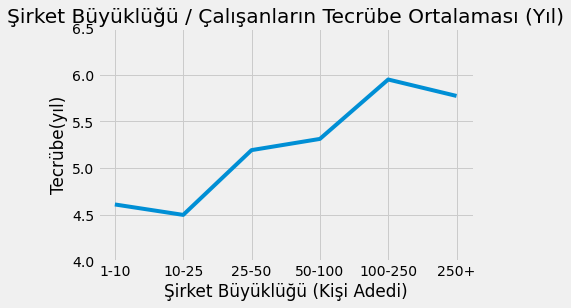

In [58]:
plt.style.use("fivethirtyeight")
comp2.plot(ylabel = "Tecrübe(yıl)",ylim = (4,6.5), xlabel = "Şirket Büyüklüğü (Kişi Adedi)", title = "Şirket Büyüklüğü / Çalışanların Tecrübe Ortalaması (Yıl)")

### Analiz 6 - Seviyeye göre tecrübe 2

In [59]:
exp2 = df_tl.groupby('level')['experience'].mean()

<AxesSubplot:title={'center':'Level / Çalışanların Tecrübe Oranı (Yıl)'}, xlabel='Title/Ünvan', ylabel='Tecrübe(yıl)'>

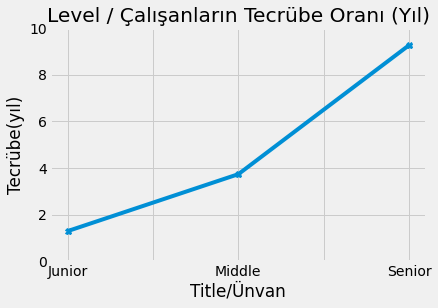

In [60]:
plt.style.use("fivethirtyeight")
exp2.plot(ylabel = "Tecrübe(yıl)",ylim = (0,10), xlabel = "Title/Ünvan", title = "Level / Çalışanların Tecrübe Oranı (Yıl)", marker = "X")

Kıdemli çalışanların sektördeki deneyimleri ortalama 9 yıl iken juniorların yaklaşık 1 yıldır.

### Analiz 7 - Tecrübeye göre Maaş

In [61]:
exp3 = df_tl.groupby('experience')['salary_for_tl_currency'].mean()

In [62]:
exp3

experience
0.5      7367.298578
2.0     10132.183908
4.0     13918.642682
6.0     16386.574074
8.5     19068.287037
12.0    22130.229420
15.0    23562.650602
Name: salary_for_tl_currency, dtype: float64

<AxesSubplot:title={'center':'Çalışanların Tecrübesine Göre Aldıkları Maaşlar'}, xlabel='Deneyim Yılı', ylabel='Maaş'>

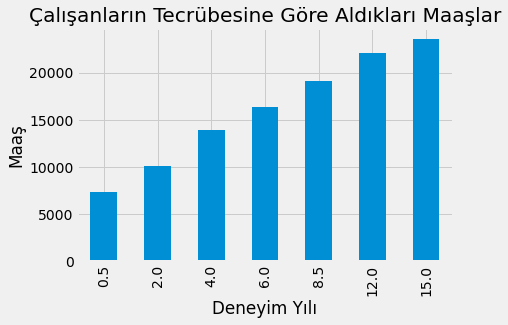

In [63]:
plt.style.use("fivethirtyeight")
exp3.plot.bar(ylabel = "Maaş", xlabel = "Deneyim Yılı", title = "Çalışanların Tecrübesine Göre Aldıkları Maaşlar")

Çalışanların sektördeki deneyimi yıl aldıkça ortalama maaşları da artmaktadır. 

### Analiz 8 - 2021/22 Yılı Ortalama Maaşların Karşılıklı Üstünlükleri

In [64]:
exp4 = df_tl.groupby('year')

In [65]:
pie1= exp4.salary_for_tl_currency.mean()
pie1.index = ["2021", "2022"]

In [66]:
pie1

2021    10338.522208
2022    16543.400846
Name: salary_for_tl_currency, dtype: float64

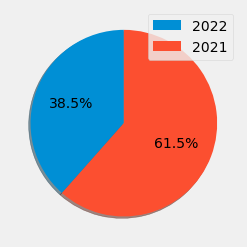

In [67]:
plt.pie(pie1, autopct='%1.1f%%', explode=[0,0], shadow=True, startangle=90)
pie1_ind = ["2022","2021"]
plt.legend(pie1_ind)

2021 yılı ve 2022 yılı ortalama maaşları bir pasta olsa pastanın %61 lik dilimini 2022 yılı alırdı.
2021 yılı ortalama maaş : 10464 TL
2022 yılı ortalama maaş : 16655 TL

Bunu bir de bar grafiğinde görelim.

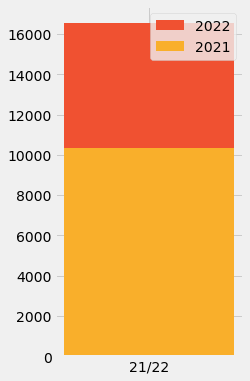

In [68]:
plt.figure(figsize=(3,6))

plt.bar(x = "21/22",height = pie1[1],color="#f05131",label = "2022",width = 0.1)
plt.bar(x = "21/22",height = pie1[0],color="#f9af2b",label = "2021",width = 0.1)
plt.legend(pie1_ind, loc = "best")

### Analiz 9 - Çalışma Ortamına Göre Deneyimler

In [69]:
df_tl.work_type.unique()

array(['Pandemi Nedeniyle; Geçici Olarak Remote', 'Ofis', 'Remote',
       'Hibrit (Ofis + Remote)',
       'Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis + Remote)'],
      dtype=object)

In [70]:
exp5 = df_tl.groupby('work_type')

In [71]:
bar1 = exp5.experience.mean()

In [72]:
bar1.index = ['Hibrit', 'Ofis', 'Geçici Hibrit', 'Geçici Ev','Ev']

<AxesSubplot:title={'center':'Çalışma Tipi / Çalışanların Tecrübe Ortalaması (Yıl)'}, ylabel='Çalışma Tipi'>

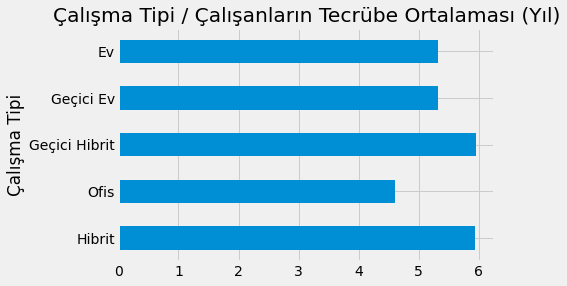

In [73]:
plt.style.use("fivethirtyeight")
bar1.plot.barh(ylabel = "Tecrübe",ylim = (4,6.5), xlabel = "Çalışma Tipi", title = "Çalışma Tipi / Çalışanların Tecrübe Ortalaması (Yıl)")

Bu analiz sonuçları birbirine yakın olduğu için net değildir fakat sadece ofiste çalışanlarının deneyiminin ortalama deneyim yılından 1 yıl az olduğu görülür. Fakat pandemi nedeniyle geçici hibrit çalışanların da deneyiminin ortalamadan yüksek olması bu tezin anlamlılığını düşürür. Çünkü beklenen geçici hibrit çalışanların ofise geçmesidir.  

### Türkiye'de Döviz ile Maaş Alanlar

Çalışmanın önceki kısmında döviz/tl değerini döndüren fonksiyondan ve dolarla maaş alan Türkiye ikametgahlılardan bahsetmiştik.
Şimdi de sadece Türkiye'de oturan ve döviz ile para kazanan çalışanları inceleyelim.

In [74]:
df_other.currency.unique()
currencies = ['€ - Euro', '$ - Dolar', '£ - Sterlin', '₺ - Türk Lirası']

In [75]:
df_other.city.unique()

array(['Yurt Dışı', 'Belcika', 'Kopenhag', 'Dubai', 'Ankara', 'Portekiz',
       'izmir', 'İzmir', 'İstanbul', 'Londra', 'Berlin', 'San francisco',
       'Münih ', 'London', 'Antalya', 'San Francisco ',
       'Bucharest/Romania', '-', 'Londra ', 'Hamburg', 'Stuttgart ',
       'Hollanda', 'Zürih', 'amsterdam', 'Rotterdam', 'New York', 'Bursa',
       'Eskişehir ', 'Almanya ', 'Amsterdam', 'Paris', 'Zurich', 'Sydney',
       'Arizona', 'Frankfurt', 'Austin, Texas', 'Eindhoven ',
       'Braunschweig, Almanya', 'Bakü', 'New York ', 'Eskişehir', 'Konya',
       'Krakow', 'Miami', 'İngiltere', 'Düsseldorf ', 'Köln', 'Belçika',
       'Luxembourg', 'Utrecht', 'Isviçre', 'Seattle', 'Nürnberg',
       'San Fransisco', 'Stokholm', 'Tallinn', 'ABD', 'Diğer', 'Muğla',
       'Washington', 'Şırnak', 'Kaliforniya', 'Antalya ', 'İtalya',
       'Letonya', 'Berlin ', 'Indianapolis', 'costarica', 'Bratislava ',
       'Sofia', 'Dublin', 'Almanya', 'Kiev', 'Los Angeles', 'Kopenhag ',
       'Palo Al

In [76]:
cities = ['Ankara',
       'izmir', 'İzmir', 'İstanbul', 
       'Antalya', 
        'Bursa',
       'Eskişehir ','Eskişehir',
       'Kocaeli', 'Kocaeli ', 'Gaziantep', 'Konya', 'Bolu', 'Kayseri ',
       'Malatya', 'Muğla',
       'Denizli', 'Çanakkale','Düzce', 'Edirne',
       'Samsun', 'Hatay', 'Çorum', 'Antalya ', 'Kırklareli ', 'Adana',
       'Tokat','Kayseri', 'Mersin ', 'Tekirdağ',
       'Sakarya','Yalova', 'kocaeli',
       'Şanlıurfa','Trabzon', 'Mersin', 'Bandırma',
      'Şırnak', 'Erzurum', 'Zonguldak',
       'Manisa', 'Sakarya ','Kütahya', 'Kahramanmaraş',
       'Niğde', 'Aydın', 'kayseri', 'Ordu', 'Elazığ',
       'Kahramanmaraş ', 'Sivas','İzmit',
       'elazığ','bursa',
       'Edremit', 'hatay','Diyarbakır',
       'Erzurum ','Uşak', 'Şanlıurfa ',
       'çorum', 'Kırşehir','Gaziantep ', 'antalya',
       'Isparta', 'trabzon', 'Bayburt ','aydin',
      'Karabük', 'Amasya',
       'Kütahya ', 'edirne','Eskisehir', 'sakarya',
       'Adıyaman', 'Afyon', 'Erzincan',
       'Siirt', 'ESKİŞEHİR', 'Kastamonu', 'Malatya ',
       'adana', 'Alanya ','DENİZLİ', 'Trabzon ', 'Tekirdağ ',
       'Konya ', 'Samsun ']

Burada isin() fonksiyonu ile bu alanı daraltıyoruz ve istediğimiz verisetini oluşturuyoruz.

In [77]:
df_trDoviz = df_other[(df_other["currency"].isin(currencies)) & (df_other["city"].isin(cities))]

In [78]:
df_trDoviz.head(4)

,level_0,index,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,year
4,4,37,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,SaaS sağlayıcı,50 - 100 Kişi,Ofis,Ankara,$ - Dolar,4500,2021
18,18,181,Senior,CTO,Java,5 - 7 Yıl,Kadın,Startup,1 - 10 Kişi,Remote,izmir,$ - Dolar,4500,2021
23,23,244,Senior,Data Scientist,Python,5 - 7 Yıl,Erkek,Startup,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,İzmir,$ - Dolar,2500,2021
25,25,252,Senior,Team Lead,".Net, Php, Python",10 - 14 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,İstanbul,€ - Euro,5500,2021


In [79]:

df_trDoviz["Tl_Salary"] = df_other["salary_for_other_currency"]
def DovizCevir(df):
    for i in range(0,len(df["currency"])):
        if df.currency.iloc[i] == "$ - Dolar":
            df.Tl_Salary.iloc[i] = df.salary_for_other_currency.iloc[i] * dolar
        elif df.currency.iloc[i] == "€ - Euro":
            df.Tl_Salary.iloc[i] = df.salary_for_other_currency.iloc[i] * euro
        elif df.currency.iloc[i] == "£ - Sterlin":
            df.Tl_Salary.iloc[i] = df.salary_for_other_currency.iloc[i] * sterlin
        else:
            df.Tl_Salary.iloc[i] = df.salary_for_other_currency.iloc[i] 
try:
    DovizCevir(df_trDoviz)
except Exception:
    pass


C:\Users\demir\AppData\Local\Temp/ipykernel_14732/512427012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trDoviz["Tl_Salary"] = df_other["salary_for_other_currency"]
C:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [80]:
df_trDoviz.head(5)

,level_0,index,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,year,Tl_Salary
4,4,37,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,SaaS sağlayıcı,50 - 100 Kişi,Ofis,Ankara,$ - Dolar,4500,2021,75372.75
18,18,181,Senior,CTO,Java,5 - 7 Yıl,Kadın,Startup,1 - 10 Kişi,Remote,izmir,$ - Dolar,4500,2021,75372.75
23,23,244,Senior,Data Scientist,Python,5 - 7 Yıl,Erkek,Startup,100 - 250 Kişi,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,İzmir,$ - Dolar,2500,2021,41873.75
25,25,252,Senior,Team Lead,".Net, Php, Python",10 - 14 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,İstanbul,€ - Euro,5500,2021,96072.9
27,27,274,Senior,Software Development Manager,"Java, Python, Ruby",7 - 10 Yıl,Erkek,Danışmanlık,25 - 50 Kişi,Remote,İstanbul,$ - Dolar,5500,2021,92122.25


Türkiye'de Ünvanlara göre Tl ile maaş alanlar ve Döviz ile maaş alanların grafiğine bakalım.

<AxesSubplot:title={'center':'TR döviz maaş alanlar'}, xlabel='level'>

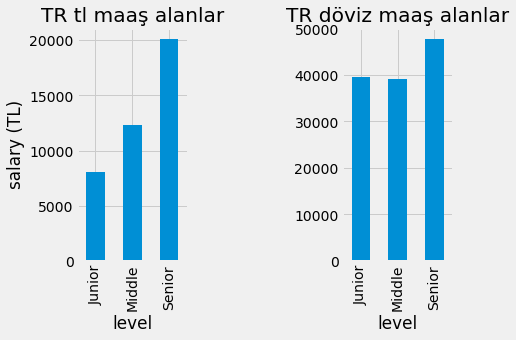

In [81]:
plt.subplot(1,3,1)
lev1.plot.bar(ylabel = "salary (TL)",title = "TR tl maaş alanlar")
plt.subplot(1,3,3)
lev3 = df_trDoviz.groupby('level')['Tl_Salary'].mean()
plt.style.use("fivethirtyeight")
lev3.plot.bar(title = "TR döviz maaş alanlar")

Döviz ile maaş alanların ortalaması beklendiği üzere çok daha fazladır.
Dikkat çeken bir diğer konu ise döviz ile maaş alanlar içerisinde ünvan farklılığı maaşa daha az yansımaktadır. 
Sayısal adedinden emin olmak için analizi yapılan kişi sayısına bakalım.

In [82]:
df_trDoviz.groupby('level')["year"].count()#year önemsiz herhangi bir kolon adı yeterli..

level
Junior     20
Middle     83
Senior    172
Name: year, dtype: int64

Kişi sayısı bu veriseti özelinde biraz azdır fakat junior ve middle ünvanlarının maaşları seniorlara çok yakındır. . 

### 2021 yılı ve 2022 yılı Ortalama Maaş Değişimi

<AxesSubplot:title={'center':'Tr Döviz Maaş Ortalamasında 1 Yıl İçindeki Değişim'}, xlabel='year'>

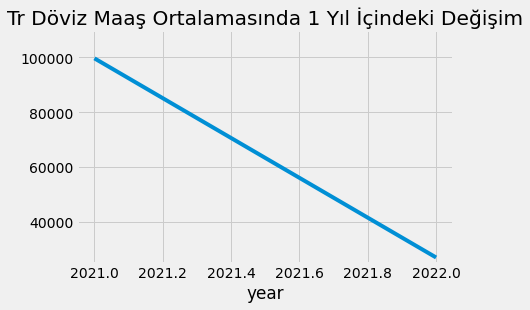

In [83]:
lev4 = df_trDoviz.groupby('year')['Tl_Salary'].mean()
plt.style.use("fivethirtyeight")
lev4.plot(title = "Tr Döviz Maaş Ortalamasında 1 Yıl İçindeki Değişim", ylim = (25000,110000))

2022 yılında maaşların önemli bir derecede azaldığı görülmektedir. Bu analiz Tr'de döviz kazananlar için yapılmıştır. Farklılığı incelemek adına bir de Tl kazananlara bakalım.

<AxesSubplot:title={'center':'TL Maaş Ortalamasında 1 Yıl İçindeki Değişim'}, xlabel='year'>

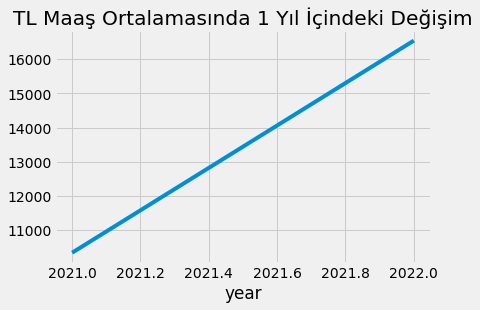

In [84]:
lev6 = df_tl.groupby('year')['salary_for_tl_currency'].mean()
plt.style.use("fivethirtyeight")
lev6.plot(title = "TL Maaş Ortalamasında 1 Yıl İçindeki Değişim")

TL olarak maaş alanlarda ise maaş ortalamasının arttığı görülmektedir. Asgari ücret ve enflasyon düşünüldüğünde bu oran normal gözükmektedir.

Döviz ile maaş alanlarda görülen ünvanlara göre dağılım yakınlığının sebebini ve Döviz olarak maaş alanlarda 2022 yılında neden düşüş yaşandığını araştıralım.

In [85]:
len(df_trDoviz)

275

In [86]:
df_other.shape

(764, 14)

In [87]:
df_trDoviz.shape

(275, 15)

In [88]:
df_trDoviz2 = df_trDoviz.reset_index(drop = True)

reset_index birkaç kez çağrıldıktan sonra buga girebilmektedir. Bunun yaşanmaması adına kopyalayarak kullanacağız.

In [89]:
df_trDoviz2[(df_trDoviz2["level"] == "Junior") & (df_trDoviz2["Tl_Salary"] >= 35000)]

,level_0,index,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,year,Tl_Salary
0,4,37,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,SaaS sağlayıcı,50 - 100 Kişi,Ofis,Ankara,$ - Dolar,4500,2021,75372.75
32,116,1295,Junior,Embedded Software Developer,C / C++,1 - 3 Yıl,Erkek,Outsource,50 - 100 Kişi,Hibrit (Ofis + Remote),İzmir,€ - Euro,9500,2021,165944.1
44,167,1886,Junior,Front-end Developer,"Python, JavaScript | Html | Css",15 Yıl ve üzeri,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,İstanbul,$ - Dolar,10500,2021,175869.75
68,232,2665,Junior,Full Stack Developer,".Net, Swift / Objective C, JavaScript | Html |...",1 - 3 Yıl,Erkek,Startup,25 - 50 Kişi,Ofis,İstanbul,€ - Euro,2500,2022,43669.5
104,320,3554,Junior,Game Developer,".Net, Unity",1 - 3 Yıl,Erkek,Oyun,1 - 10 Kişi,Remote,İstanbul,$ - Dolar,2500,2022,41873.75
120,364,3995,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,Startup,100 - 250 Kişi,Remote,Ankara,$ - Dolar,10500,2022,175869.75


Junior 20 kişi vardır ve ortalamayı yükselten 6 kişi gösterilmiştir. Bunlarda 2 tanesi Junior olmasına rağmen 12500 dolar, yaklaşık 190 bin tl aylık kazanca sahiptir. Onlara yakın bir diğer kişi ise aylık 9500 dolar kazanmaktadır. Bu üç kişi çıkartılırsa grafik şöyle gözükecektir. 

In [90]:
indd = list(df_trDoviz[df_trDoviz["index"].isin([1295,1886,3995])].index)

In [91]:
df_trDoviz.drop([indd[0],indd[1],indd[2]], axis=0, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:title={'center':'TR döviz maaş alanlar'}, xlabel='level'>

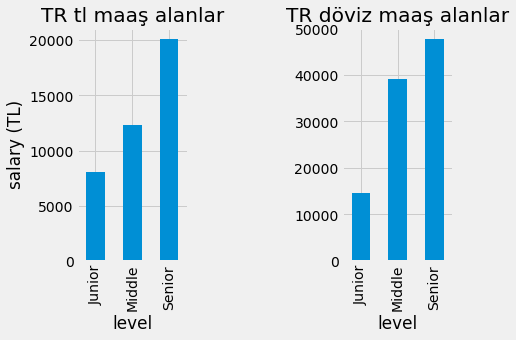

In [92]:
plt.subplot(1,3,1)
lev1.plot.bar(ylabel = "salary (TL)",title = "TR tl maaş alanlar")
plt.subplot(1,3,3)
lev7 = df_trDoviz.groupby('level')['Tl_Salary'].mean()
plt.style.use("fivethirtyeight")
lev7.plot.bar(title = "TR döviz maaş alanlar")

Görüldüğü gibi o 3 kişinin datasetten çıkarılması grafiği beklenen duruma getirmiştir. Burada beklenen durumun 'kıdemlilerin daha fazla para kazanması' çıkarımı ise toplumsal normlardan ziyade sayısal olarak da yüksek verili verisetlerinde görülmektedir. 

In [93]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["level"] == "Senior")])/len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["level"] == "Junior")])

15.333333333333334

In [94]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["level"] == "Senior")])/len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["level"] == "Junior")])

7.411764705882353

2021 yılında Senior ünvanına sahip çalışanların Junior'lardan 15 kat daha fazla oldukları görülmektedir.
2022 yılında ise bu oran 7.41'dir. Bu oran 2022 yılında ortalama maaşların düşüklüğünü açıklamak için bir gözlemdir.

In [95]:
new_dict5 = {
    "experience" : {
        "0 - 1 Yıl" : 0.5,
        "1 - 3 Yıl" : 2,
        "3 - 5 Yıl" : 4,
        "5 - 7 Yıl" : 6,
        "7 - 10 Yıl" : 8.5,
        "10 - 14 Yıl" : 12,
        "15 Yıl ve üzeri" : 15,

    }
}
df_trDoviz2 = df_trDoviz2.replace(new_dict5)

In [96]:
pd.to_numeric(df_trDoviz2["experience"])

0       0.5
1       6.0
2       6.0
3      12.0
4       8.5
       ... 
270     8.5
271     4.0
272     2.0
273     8.5
274    15.0
Name: experience, Length: 275, dtype: float64

In [97]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["experience"] >= 8)])/len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["experience"] < 8)])

1.4444444444444444

In [98]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["experience"] >= 8)])/len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["experience"] < 8)])

0.7863247863247863

Yukarıdaki ünvan oranına yakın bir durum ise tecrübedir. 8 yıldan fazla tecrübeli çalışan sayısının 8 yıldan az tecrübeye sahip çalışan sayısına oranı 2021'de 1.44 iken 2022'de 0.78 dir. 

In [99]:
comp5 = df_trDoviz2.groupby('company_size')['experience'].mean()

<AxesSubplot:title={'center':'Şirket Büyüklüğü / Çalışanların Tecrübe Ortalaması (Yıl)'}, xlabel='Şirket Büyüklüğü (Kişi Adedi)', ylabel='Tecrübe(yıl)'>

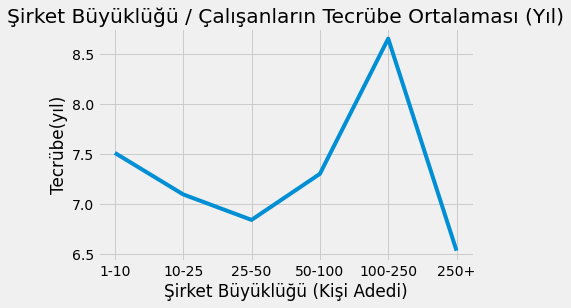

In [100]:
aa = comp5[2]
comp5[2] = comp5[3]
comp5[3] = aa
bb = comp5[3]
comp5[3] = comp5[5]
comp5[5] = bb
comp5.index = ['1-10', '10-25', '25-50', '50-100','100-250', '250+']
comp5.plot(ylabel = "Tecrübe(yıl)", xlabel = "Şirket Büyüklüğü (Kişi Adedi)", title = "Şirket Büyüklüğü / Çalışanların Tecrübe Ortalaması (Yıl)")

In [101]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["company_size"].isin(["100 - 250 Kişi","100 - 250 Kişi","250+"]))])/len(df_trDoviz2[(df_trDoviz2["year"] == 2021) & (df_trDoviz2["company_size"].isin(["10 - 25 Kişi","1 - 10 Kişi","25 - 50 Kişi","50 - 100 Kişi"]))])

0.3469387755102041

In [102]:
len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["company_size"].isin(["100 - 250 Kişi","100 - 250 Kişi","250+"]))])/len(df_trDoviz2[(df_trDoviz2["year"] == 2022) & (df_trDoviz2["company_size"].isin(["10 - 25 Kişi","1 - 10 Kişi","25 - 50 Kişi","50 - 100 Kişi"]))])

0.41216216216216217

Bu alanda görüldüğü üzere Döviz üzerinden kazananların şirketlerinde kişi adedine göre ölçülük büyüklük baz alındığında ortalama tecrübe yılı(tecrübe arttıkça kazanç artar demiştik) doğru bir oranda artmamaktadır. Yani nüfusu fazla yazılımcı bulunduran şirketlerde yeni işe başlayan kişi sayısı daha fazla olmakta, bu durumda ortalama deneyim yılı düşmekte ve yeni başlayanlara daha düşük ücret ödendiğinden verilen ortalama maaş düşmektedir. 

Bu sebepten kodlarda gördüğümüz 2021 yılında 100 kişiden fazla kişi çalıştıran şirketlerin 100den az kişi çalıştıran şirketlerdeki çalışan sayısına oranı 2022 den düşük çıkması 2022 yılında kaydedilen anket sonucundaki çalışanların, 21 yılına göre biraz daha fazla oranla nüfusu az olan şirketlerde çalıştığı anlaşılmaktadır. Fakat şirket büyüklüğünün ücret olarak net bir anlam ifade etmemesi 2022 yılında döviz kazananların ortalama maaşlarının düşmesini açıklamaz. 

## Genel Yorum

Çalışmamız bir veri seti üzerinden hangi analizlerin yapılabileceğini ve ne şekilde düşünmemiz gerektiğini bir ölçüde gösterebilmek amacıyla yapılmıştır. 

Bu çalışmada 2021 ve 2022 yılında ankete dahil olan bir grup yazılımcı hakkında bilgiler toparlanmış ve düzenlenmiştir. Daha sonrasında bu veriler üzerinde analizler yapılarak grafik üzerinde anlamlandırılmaya çalışılmıştır. 